# Linear Regression

- Generate dummy dataset as [x,y]
- Sampling: split as [x_train, y_train] & [x_test, y_test]
- Model by **tensorflow** + *keras*
- Performance check [optimization: SGD, loss: MSE]
- Prediction


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## preparation - dataset

In [6]:
# generate 50 size dataset(x, y=h(x))
# add noise to dataset(x, y)
# graph dataset(x, y)

x = np.linspace(0, 50, 50)   #0 to 50, 50 sample, float
y = np.linspace(0, 50, 50)

print('x', x[0:5])
print('y', y[0:5])

x [0.         1.02040816 2.04081633 3.06122449 4.08163265]
y [0.         1.02040816 2.04081633 3.06122449 4.08163265]


In [7]:
# add noise

x += np.random.default_rng(1).random(50)
y += np.random.default_rng(1).uniform(-5, 5, 50)

print('x', x[0:5])
print('y', y[0:5])

print('shape', x.shape, y.shape)

x [0.51182162 1.97087186 2.18497594 4.00987394 4.39346411]
y [ 0.11821625  5.52504513 -1.51758755  7.54771896  2.19994717]
shape (50,) (50,)


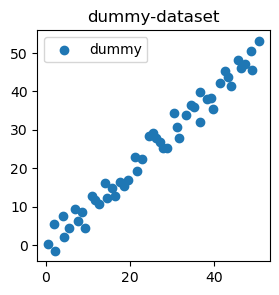

In [8]:
plt.figure(figsize=(3,3))
plt.scatter(x, y, label="dummy")

plt.title("dummy-dataset")
plt.legend()
plt.show()

## model

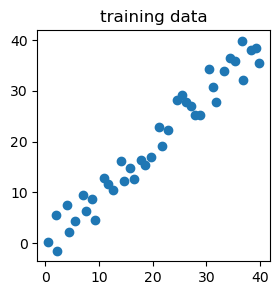

In [9]:
# sampling
# split data as train and test set

x_train = x[0:40]
y_train = y[0:40]

x_test = x[40:]
y_test = y[40:]

plt.figure(figsize=(3,3))
plt.title("training data")
plt.scatter(x_train, y_train)
plt.show()

In [10]:
# reshape numpy arrays

x_train = np.reshape(x_train, (-1,1))   # (40,) -> (40, 1)
# y_train                               # (40,)

print(np.shape(x_train), np.shape(y_train))

(40, 1) (40,)


In [11]:
# create a sequential model
# ..keras.model
# ..keras.layer
# ..keras.optimizers
# ..keras.losses

# hypothesis
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1)) # output (none, 1)

# optimizer # loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              loss=tf.keras.losses.mse)

# train
train = model.fit(x_train, y_train, epochs=50)

Epoch 1/50


2023-07-09 20:26:49.398618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 16ms/step - loss: 3494.6772
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 2272.4067
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 1448.7974
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 950.7256
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 628.7716
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 405.1072
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 247.7197
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: 151.4881
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 98.9445
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 63.7313
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 43.8396
Epoch 12/50
2/2 [==============================] - 0s 7ms/step - loss: 30.0763
Epoch 13/50
2/2 [==============================] - 0s 6ms/st

## model - performance

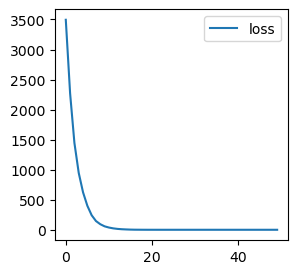

In [12]:
# performance analysis

plt.figure(figsize=(3,3))
plt.plot(train.history['loss'], label="loss")
plt.legend()
plt.show()

## model - prediction

1/1 [==============================] - 0s 86ms/step


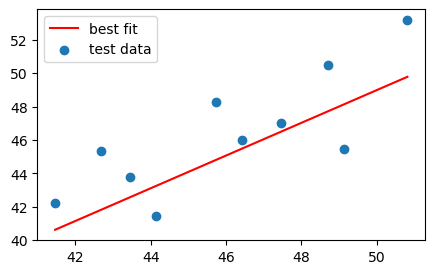

In [13]:
# prediction

y_pred = model.predict(np.reshape(x_test, newshape=(-1,1)))  #reshape (10,) -> (10,1)

plt.figure(figsize=(5,3))
plt.plot(x_test, y_pred, color="red", label="best fit")

plt.scatter(x_test, y_test, label= "test data")
plt.legend()
plt.show()